In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from df_utils import * 
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

In [2]:
run="run1"
if(run=="run1"):
    run_flag="NuMI Run 1"
    dt_variation = ['LYDown',
                'LYRayleigh',
                'Recomb',
                'SCE',
                'WireModdEdX',
                'WireModThetaXZ',
                'WireModThetaYZ_withouts',
                'WireModX',
                'WireModYZ']

    variation_legend =['Light Yield Down',
                   'Light Yield Rayleigh',
                   'Recombination',
                   'SCE',
                   'Wire Mod dEdx',
                   r'Wire Mod $\theta_{xz}$',
                   r'Wire Mod $\theta_{yz}$',
                   'Wire Mod X',
                   'Wire Mod YZ']
    variations_colors =["magenta","brown", "blue", "skyblue", "lime", "forestgreen", "gold", "peru","slategray"]
else:
    run_flag="NuMI Run 3"
    dt_variation = ['LYAttenuation',
                'LYDown',
                'LYRayleigh',
                'Recomb',
                'SCE',
                'WireModdEdX',
                'WireModThetaXZ',
                'WireModThetaYZ_withouts',
                'WireModX',
                'WireModYZ']

    variation_legend =['Light Yield Attenuation',
                   'Light Yield Down',
                   'Light Yield Rayleigh',
                   'Recombination',
                   'SCE',
                   'Wire Mod dEdx',
                   r'Wire Mod $\theta_{xz}$',
                   r'Wire Mod $\theta_{yz}$',
                   'Wire Mod X',
                   'Wire Mod YZ']
    variations_colors =["crimson", "magenta","brown", "blue", "skyblue", "lime", "forestgreen", "gold", "peru","slategray"]

base_dir = "/home/lmlepin/Desktop/dm_sets/dark_tridents_analysis/{}_det_vars/".format(run)
figure_path = '/home/lmlepin/Desktop/Plots_DT_Drive/2023/det_var/'

In [3]:
variable = "signal_score"
df_list = []
df_list_pre = []
df_cv = pd.read_csv(base_dir + "{}_CV_CNN_scores_8441_steps.csv".format(run))
#df_cv = make_unique_ev_id(df_cv)
#df_cv = filter_df(df_cv,variable)
df_list_pre.append(df_cv)

In [4]:
for var in dt_variation:
    file_name=base_dir + run + "_"+ var +"_CNN_scores_8441_steps.csv"
    df = pd.read_csv(file_name)
    #df = filter_df(df,variable)
    df_list_pre.append(df)


minimum = 10000000
for df in df_list_pre:
    temp_min = len(df)
    if(minimum > temp_min):
        minimum = temp_min
    else:
        continue     

for df in df_list_pre:
    df_list.append(df.head(minimum))

/home/lmlepin/anaconda3/envs/dark_trident/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


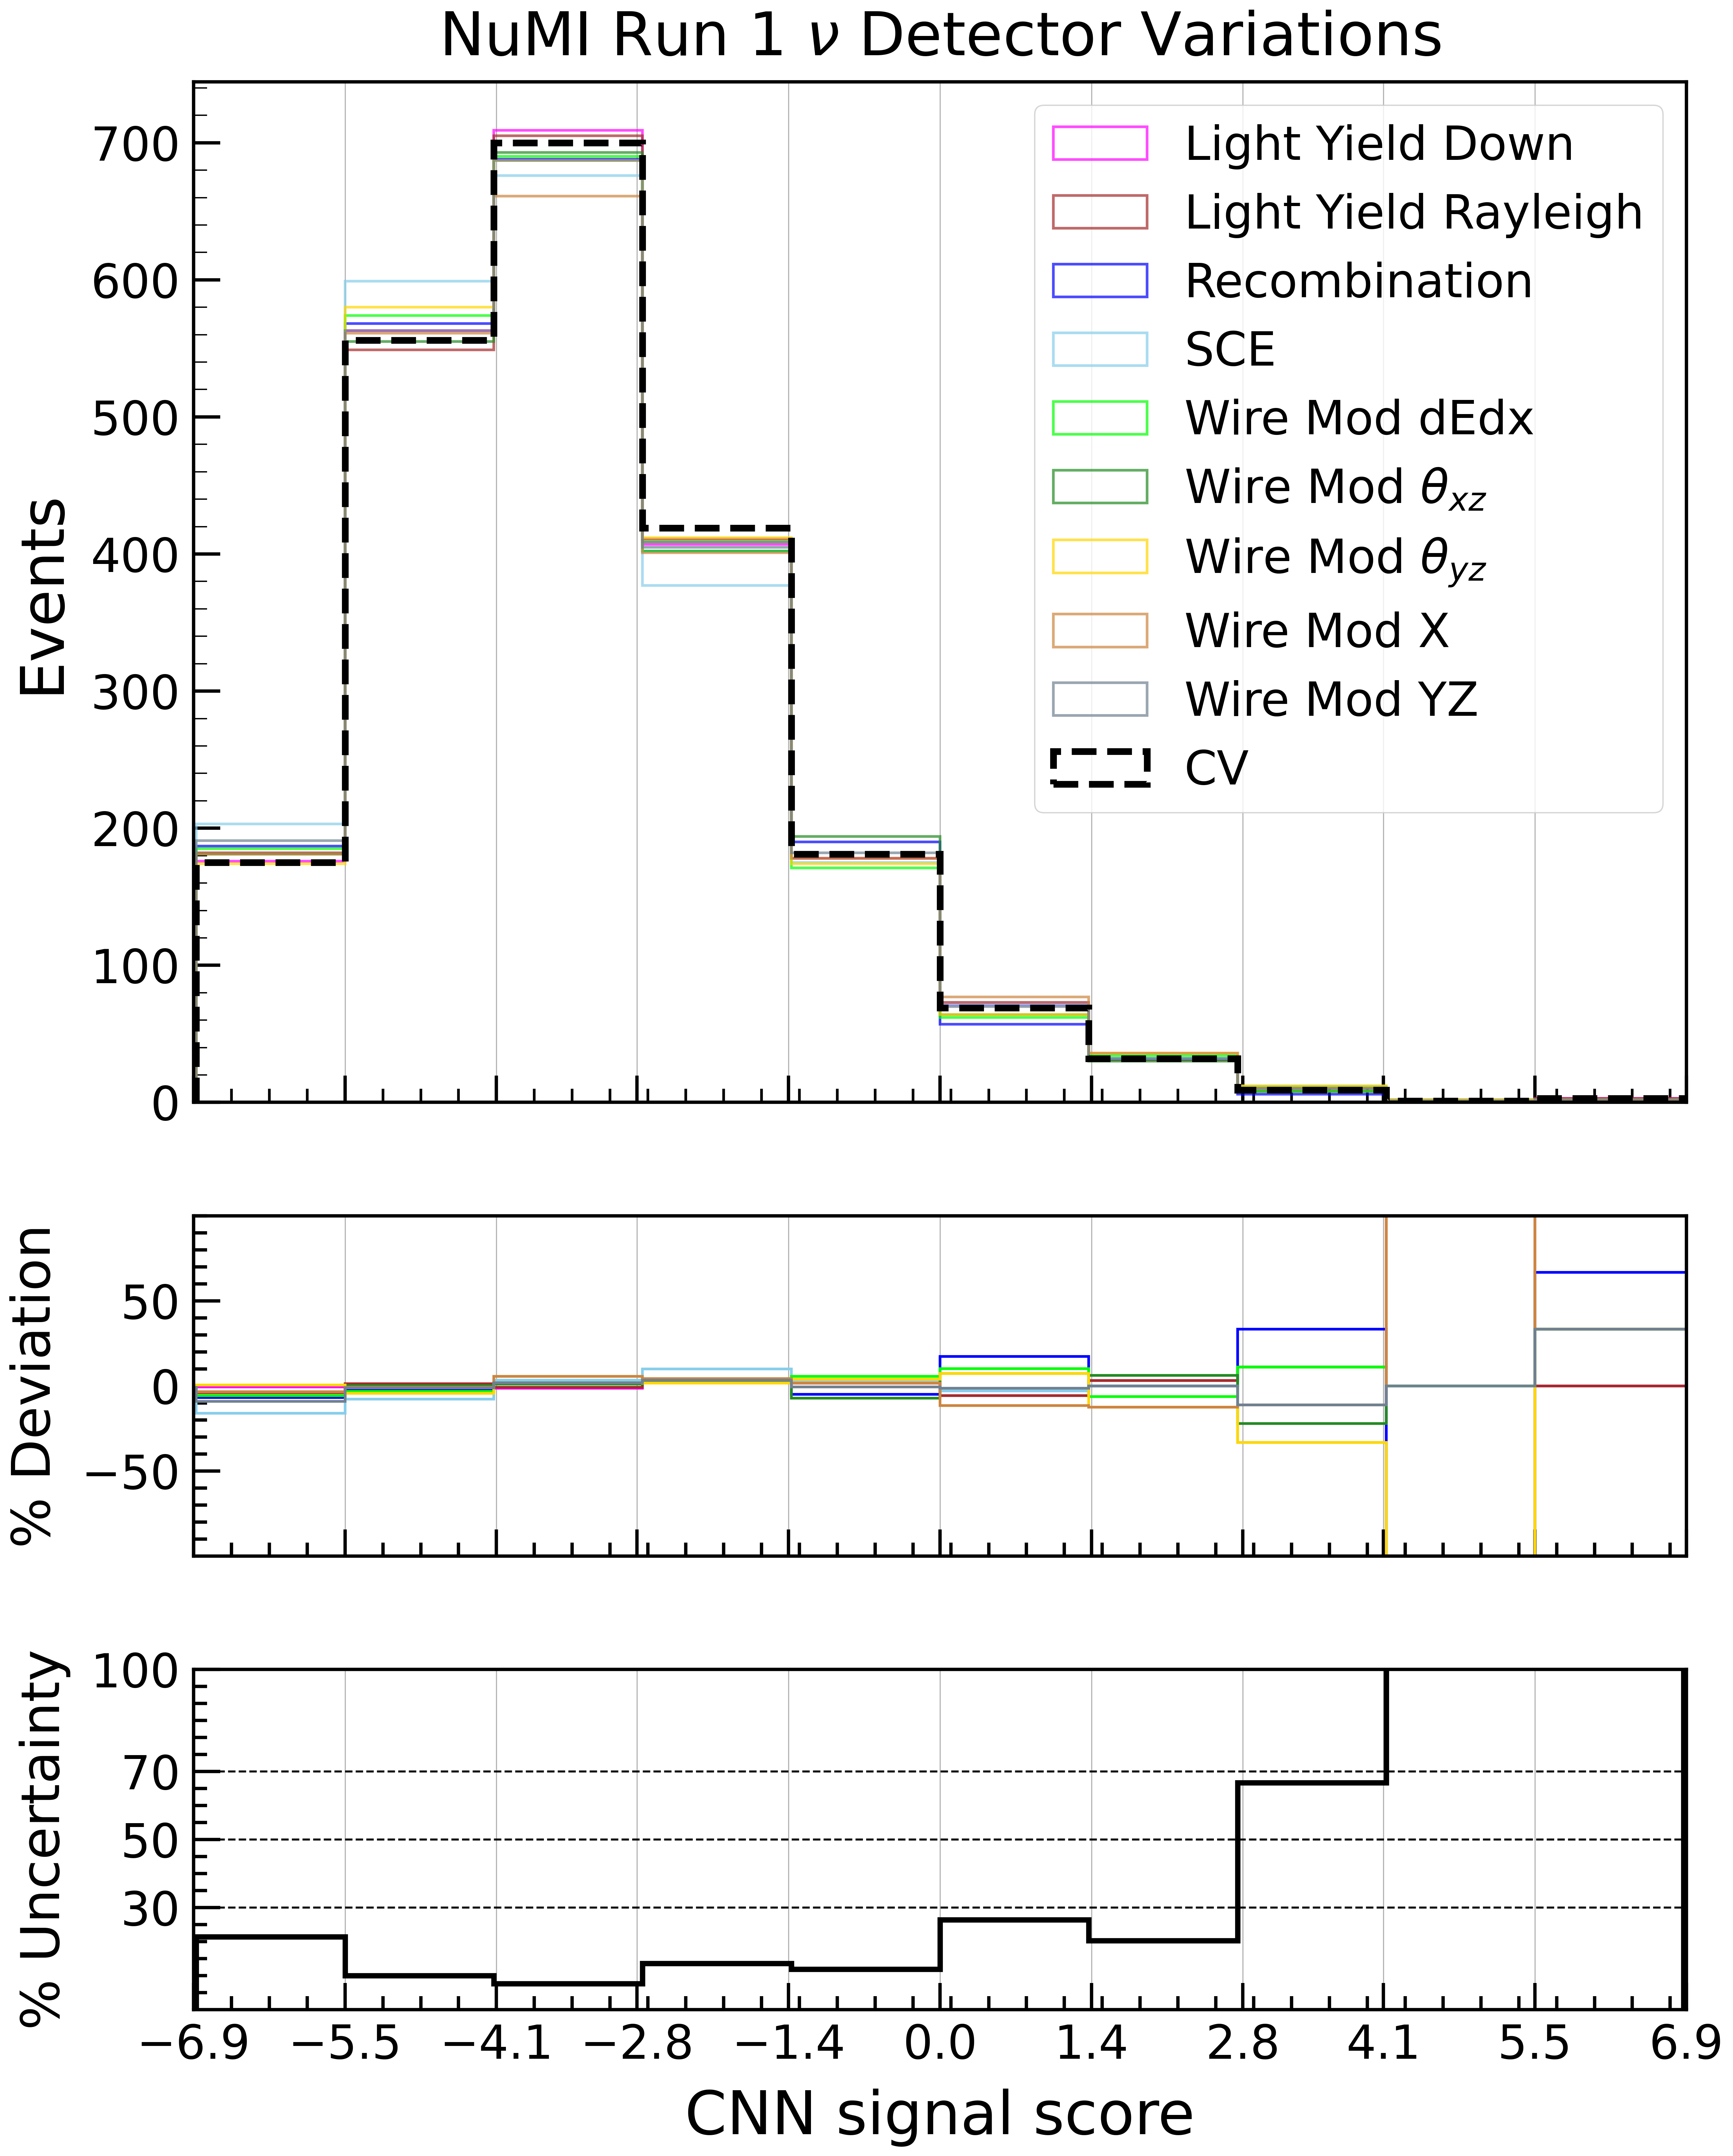

In [5]:
min_val = -6.876 
max_val = 6.876
nbins = 10


my_custom_bins = [-6.875, -5.5, -4.125, -2.75, -1.375, 0., 1.375, 2.75, 4.125, 5.5, 11.]
final_custom_bins = [-6.875, -5.5, -4.125, -2.75, -1.375, 0., 1.375, 2.75, 4.125, 5.5, 6.875] # One final overflow bin

fig,ax = plt.subplots(nrows=3, ncols=1, sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]}, figsize=[20,26],dpi=300)

for axis in ['top', 'bottom', 'left', 'right']:
    ax[0].spines[axis].set_linewidth(2.5)  # change width
    ax[0].spines[axis].set_color('black')    # change color
    
for axis in ['top', 'bottom', 'left', 'right']:
    ax[1].spines[axis].set_linewidth(2.5)  # change width
    ax[1].spines[axis].set_color('black')    # change color
    
for axis in ['top', 'bottom', 'left', 'right']:
    ax[2].spines[axis].set_linewidth(2.5)  # change width
    ax[2].spines[axis].set_color('black')    # change color
    

ax[0].set_title(r'{} $\nu$ Detector Variations'.format(run_flag) ,fontsize=45, pad=20)
ax[0].set_ylabel(r'Events',fontsize=45,labelpad=15)
ax[1].set_ylabel('% Deviation',fontsize=40,labelpad=15)
ax[2].set_xlabel(r'CNN signal score',fontsize=45,labelpad=15)
ax[2].set_ylabel('% Uncertainty',fontsize=40,labelpad=15)

ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1].yaxis.set_minor_locator(AutoMinorLocator())
ax[2].xaxis.set_minor_locator(AutoMinorLocator())
ax[2].yaxis.set_minor_locator(AutoMinorLocator())

(counts_cv, bins_cv) = np.histogram(logit_transform(df_list[0]['signal_score']), bins=my_custom_bins)
(counts_fake, bins_final) = np.histogram(logit_transform(df_list[0]['signal_score']), bins=final_custom_bins)
df_list.pop(0)
count_list = 0 

error = np.zeros(len(final_custom_bins)-1)

for df in df_list: 
    (counts, bins) = np.histogram(logit_transform(df['signal_score']), bins=my_custom_bins)
    ax[0].hist(bins_final[:-1], bins_final, weights=counts,alpha=0.7, histtype='step',log=False,label=variation_legend[count_list],lw=2,color=variations_colors[count_list])
    ratio = (counts_cv - counts) / counts_cv
    ax[1].hist(bins[:-1],bins,weights=ratio*100,histtype='step',orientation='vertical',label=str(var),lw=2,color=variations_colors[count_list]) 
    error=ratio**2+error
    count_list+=1

err=np.sqrt(error)   
ax[2].hist(bins_final[:-1],bins_final,weights=err*100,histtype='step',color='black',label='Detector variations error',lw=4)  
ax[2].hlines(70,min_val,max_val,color='black',linestyle="--",linewidth=1.5)
ax[2].hlines(50,min_val,max_val,color='black',linestyle="--",linewidth=1.5)
ax[2].hlines(30,min_val,max_val,color='black',linestyle="--",linewidth=1.5)
ax[1].tick_params(axis='both', which='minor',direction="in", length=10, width=2.5, labelsize=35,pad=10)
ax[2].tick_params(axis='both', which='minor',direction="in", length=10, width=2.5, labelsize=35,pad=10)
ax[1].tick_params(axis='both', which='major',direction="in", length=20, width=2.5, labelsize=35,pad=10)
ax[2].tick_params(axis='both', which='major',direction="in", length=20, width=2.5, labelsize=35,pad=10)
ax[0].tick_params(axis="y", which='major', direction="in",length=20,width=2.5,pad=10, labelsize=35)
ax[0].tick_params(axis="y", which='minor', direction="in",length=10,width=1.0,labelleft=False, labelsize=35,pad=10)
ax[0].tick_params(axis="x", which='major', direction="in",length=20,width=2.5,pad=10,top=False,labelbottom=False)
ax[0].tick_params(axis="x", which='minor', direction="in",length=10,width=2.0,top=False,labelbottom=False)
ax[0].hist(bins_final[:-1], bins_final, weights=counts_cv, histtype='step',label='CV',color='black',linestyle="--",log=False,lw=5)
ax[0].legend(fontsize=35,loc='upper right')
ax[0].grid(axis='x')
ax[1].grid(axis='x')
ax[2].grid(axis='x')
ax[0].set_xlim([min_val,max_val])
ax[1].set_xlim([min_val,max_val])
ax[2].set_xlim([min_val,max_val])

ax[0].set_xticks(np.round(bins_final,1))
ax[1].set_xticks(np.round(bins_final,1))
ax[2].set_xticks(np.round(bins_final,1))

ax[1].set_yticks([-50,0,50])
ax[1].set_ylim([-100,100])

ax[2].set_yticks([30,50,70,100])
ax[2].set_ylim([0.,100])

plt.savefig(figure_path + "{}_det_var_cnn_dist_V1.pdf".format(run),bbox_inches="tight")
plt.savefig(figure_path + "{}_det_var_cnn_dist_V1.png".format(run),bbox_inches="tight")
plt.show()